<a href="https://colab.research.google.com/github/pnperl/blank-app/blob/main/Sharedcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Index for SBIN.NS: DatetimeIndex(['2024-08-01 00:00:00+05:30', '2024-08-02 00:00:00+05:30',
               '2024-08-05 00:00:00+05:30', '2024-08-06 00:00:00+05:30',
               '2024-08-07 00:00:00+05:30', '2024-08-08 00:00:00+05:30',
               '2024-08-09 00:00:00+05:30', '2024-08-12 00:00:00+05:30',
               '2024-08-13 00:00:00+05:30', '2024-08-14 00:00:00+05:30',
               ...
               '2025-07-21 00:00:00+05:30', '2025-07-22 00:00:00+05:30',
               '2025-07-23 00:00:00+05:30', '2025-07-24 00:00:00+05:30',
               '2025-07-25 00:00:00+05:30', '2025-07-28 00:00:00+05:30',
               '2025-07-29 00:00:00+05:30', '2025-07-30 00:00:00+05:30',
               '2025-07-31 00:00:00+05:30', '2025-08-01 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=251, freq=None)
First 5 dates: DatetimeIndex(['2024-08-01 00:00:00+05:30', '2024-08-02 00:00:00+05:30',
               '2024-08-05 00:00:00+05:30', '2024-08-06

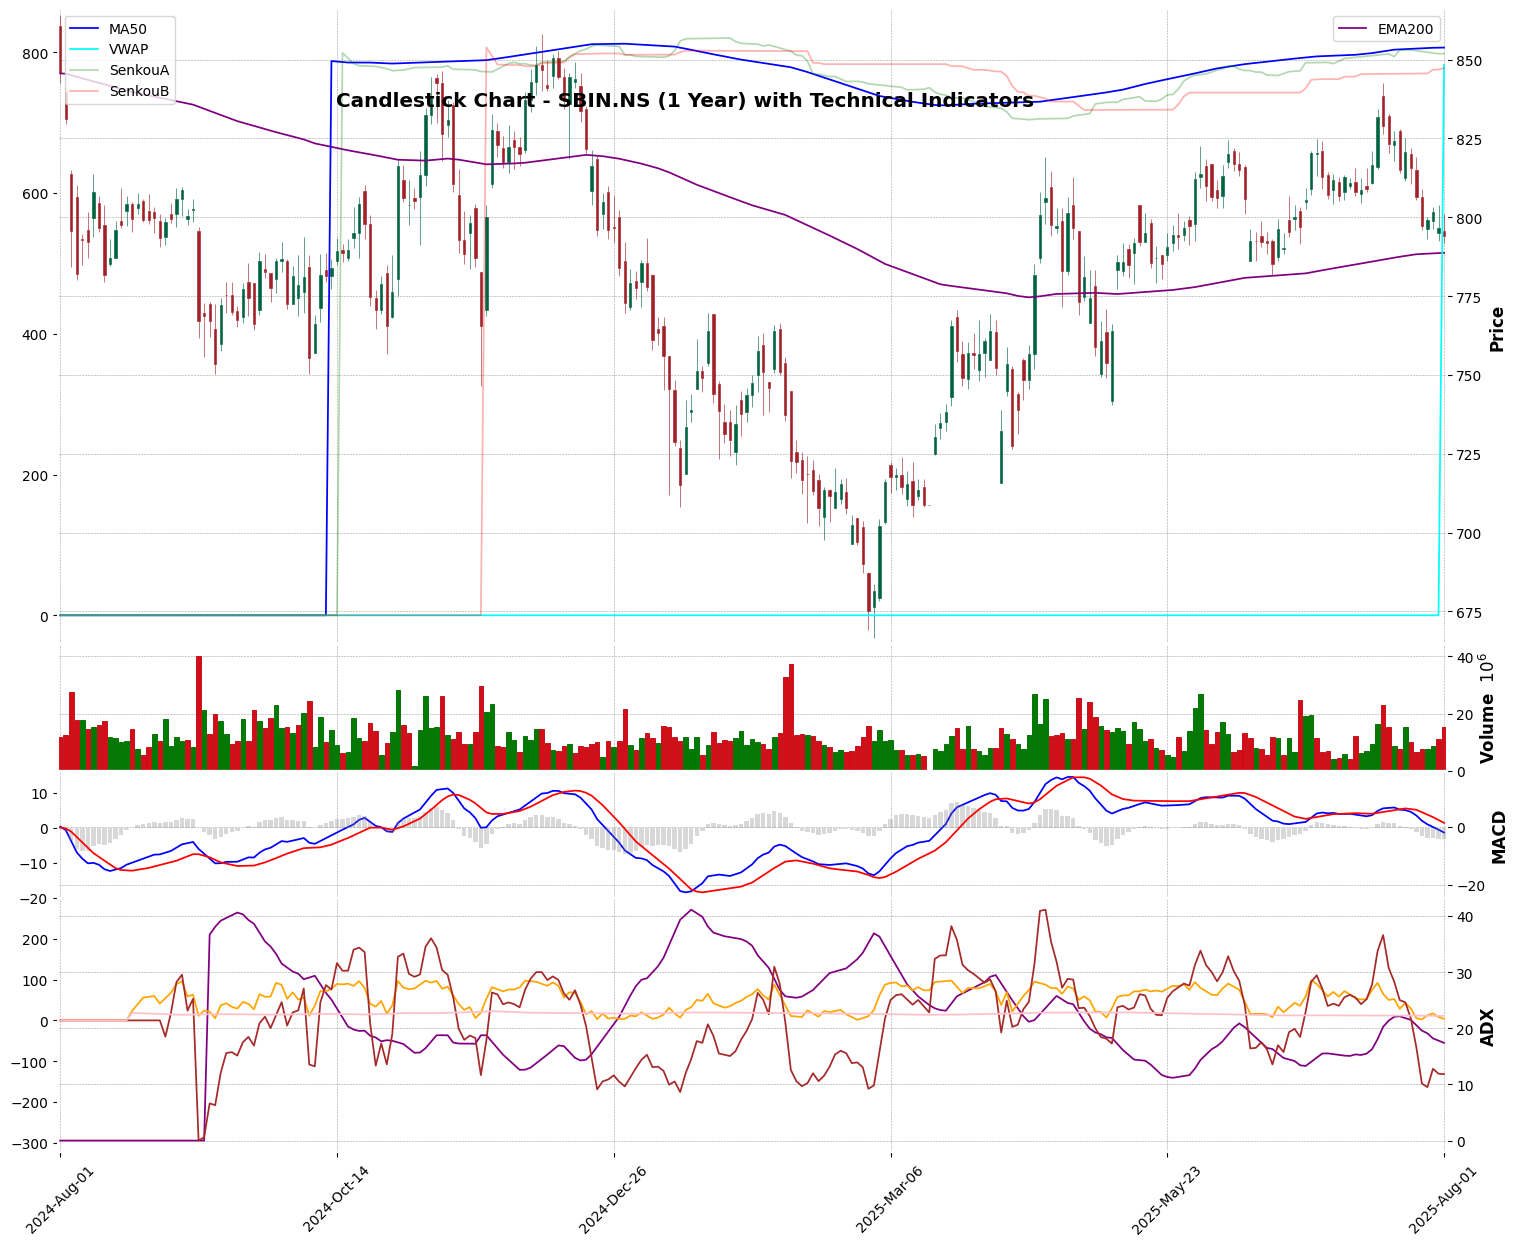

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Index for VOLTAS.NS: DatetimeIndex(['2024-08-01 00:00:00+05:30', '2024-08-02 00:00:00+05:30',
               '2024-08-05 00:00:00+05:30', '2024-08-06 00:00:00+05:30',
               '2024-08-07 00:00:00+05:30', '2024-08-08 00:00:00+05:30',
               '2024-08-09 00:00:00+05:30', '2024-08-12 00:00:00+05:30',
               '2024-08-13 00:00:00+05:30', '2024-08-14 00:00:00+05:30',
               ...
               '2025-07-21 00:00:00+05:30', '2025-07-22 00:00:00+05:30',
               '2025-07-23 00:00:00+05:30', '2025-07-24 00:00:00+05:30',
               '2025-07-25 00:00:00+05:30', '2025-07-28 00:00:00+05:30',
               '2025-07-29 00:00:00+05:30', '2025-07-30 00:00:00+05:30',
               '2025-07-31 00:00:00+05:30', '2025-08-01 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=251, freq=None)
First 5 dates: DatetimeIndex(['2024-08-01 00:00:00+05:30', '2024-08-02 00:00:00+05:30',
               '2024-08-05 00:00:00+05:30', '2024-08-

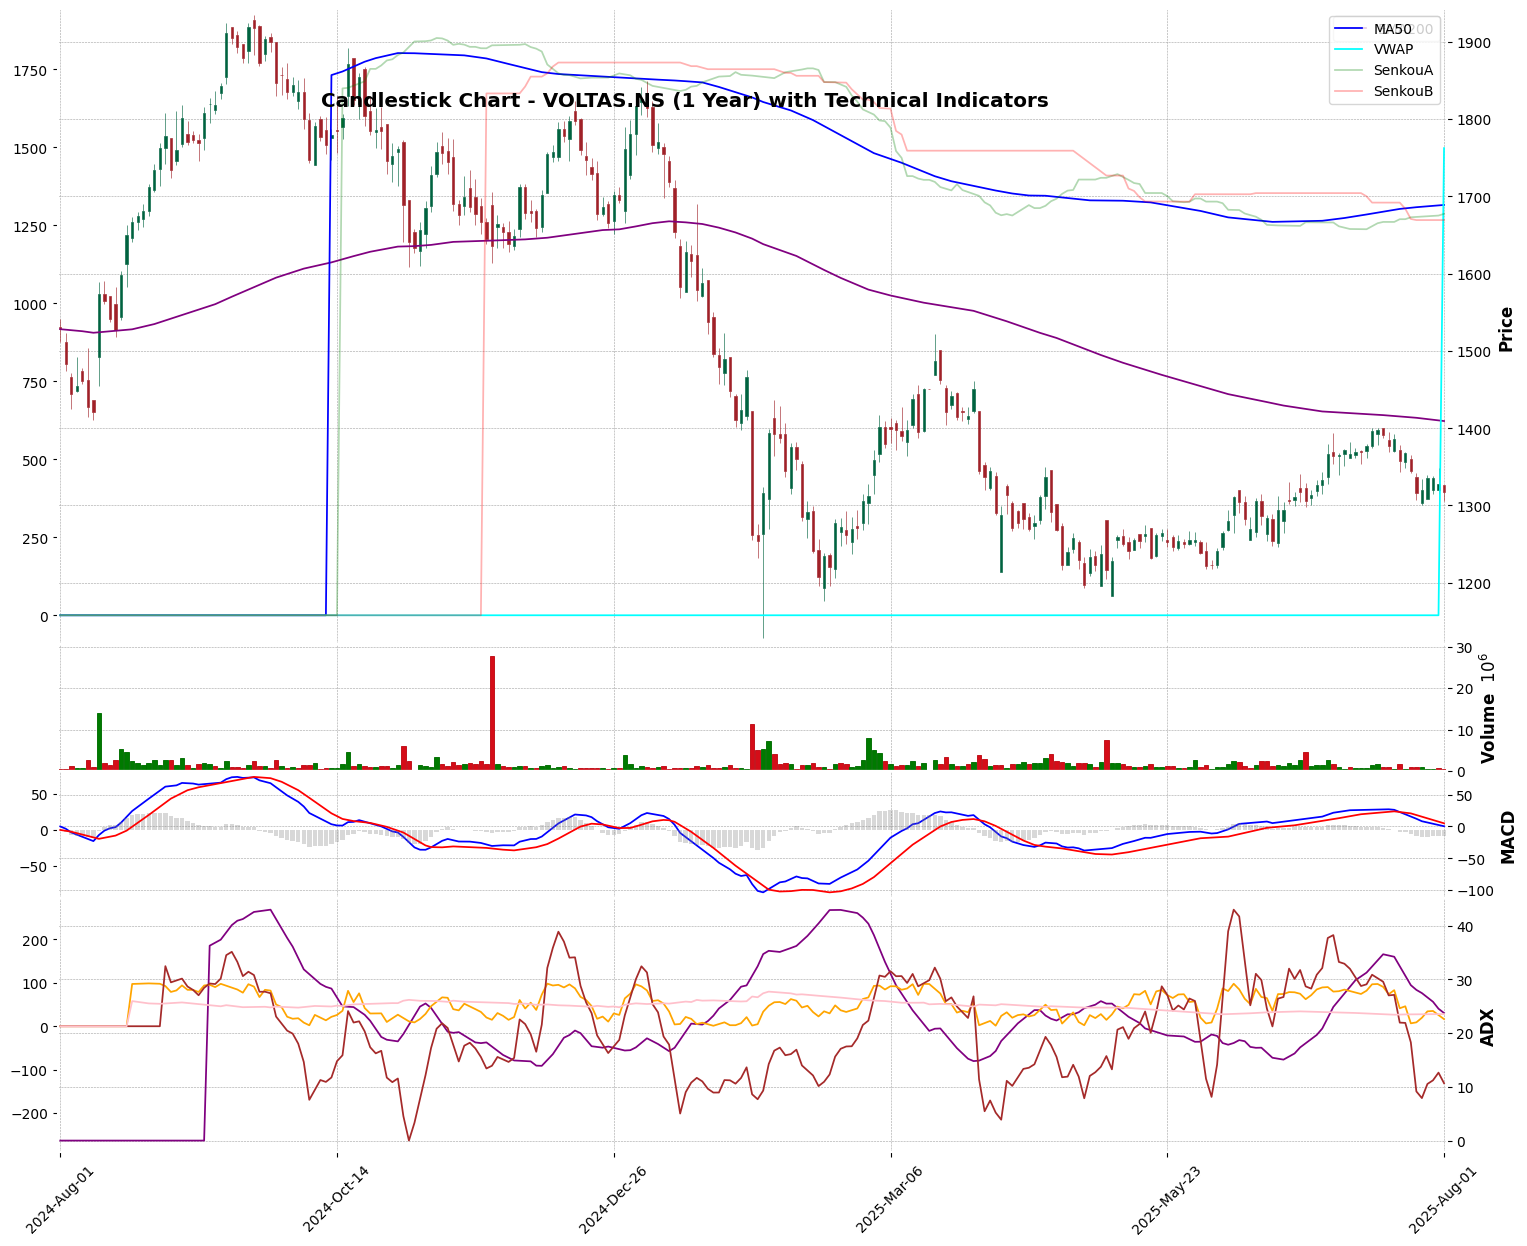

In [ ]:
# Install required libraries quietly in Colab
!pip install -q yfinance pandas numpy matplotlib mplfinance ta

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from IPython.display import display, HTML
import ta
from requests.exceptions import HTTPError, ConnectionError
from datetime import datetime

# Configuration dictionary
CONFIG = {
    'ma_windows': [5, 10, 20, 50, 100, 200],
    'ema_spans': [12, 26, 9],
    'rsi_window': 14,
    'rsi_overbought': 70,
    'rsi_oversold': 30,
    'rsi_threshold': 60,
    'rsi_reversal_lookback': 5,
    'rsi_reversal_threshold': 0.01,
    'bb_window': 20,
    'bb_multiplier': 2,
    'cci_constant': 0.015,
    'adx_window': 14,
    'adx_threshold': 25,
    'price_change_threshold': 0.02,
    'volume_multiplier': 2,
    'pivot_window': 20,
    'pivot_lookback': 60,
    'sr_proximity_threshold': 0.03,
    'plot_style': 'charles',
    'figratio': (16, 12),  # Increased height for readability
    'figscale': 2.0,      # Adjusted for better visibility
    'signal_weights': {
        'price_above_ma50': 0.20,
        'rsi_momentum': 0.10,
        'rsi_centerline': 0.05,
        'rsi_reversal': 0.10,
        'rsi_overbought_oversold': -0.05,
        'macd_crossover': 0.15,
        'adx_trend': 0.10,
        'volume_breakout': 0.05,
        'sr_proximity': 0.20,
        'ema_crossover': 0.20
    },
    'timeframe_weights': {
        'short': {'rsi_momentum': 0.20, 'stochastic': 0.15, 'adx': 0.15, 'volume': 0.10},
        'medium': {'macd': 0.25, 'rsi': 0.15, 'cci': 0.10, 'ma_trend': 0.15},
        'long': {'ema200': 0.25, 'macd': 0.20, 'adx': 0.20, 'obv': 0.10}
    },
    'fundamental_weights': {
        'pe_ratio': 0.30,
        'eps_growth': 0.30,
        'dividend_yield': 0.20,
        'sector_performance': 0.20
    },
    'risk_management': {
        'atr_multiplier_stop_loss': 2,
        'position_size_risk_percent': 0.01  # 1% of portfolio per trade
    }
}

# Indicator Interpretations
INDICATOR_INTERPRETATIONS = {
    'RSI': """
        <b>Relative Strength Index (RSI):</b> Measures momentum on a scale of 0–100.
        - <b>Above 70</b>: Overbought, potential for pullback or reversal.
        - <b>Below 30</b>: Oversold, potential buying opportunity.
        - <b>50–70</b>: Bullish momentum; <b>30–50</b>: Bearish or neutral.
        - <b>Use:</b> Look for reversals near extremes or divergence with price.
    """,
    'Stochastic': """
        <b>Stochastic Oscillator:</b> Compares closing price to price range over 14 periods.
        - <b>Above 80</b>: Overbought, watch for sell signals.
        - <b>Below 20</b>: Oversold, watch for buy signals.
        - <b>Use:</b> Confirm entries with crossovers (%K crosses %D) in extreme zones.
    """,
    'MACD': """
        <b>MACD:</b> Difference between 12-period and 26-period EMAs, with a 9-period signal line.
        - <b>MACD > Signal</b>: Bullish momentum.
        - <b>MACD < Signal</b>: Bearish momentum.
        - <b>Above 0</b>: Bullish trend; <b>Below 0</b>: Bearish trend.
        - <b>Use:</b> Look for crossovers and zero-line crossings for trend confirmation.
    """,
    'ADX': """
        <b>Average Directional Index (ADX):</b> Measures trend strength.
        - <b>Above 25</b>: Strong trend (bullish or bearish).
        - <b>Below 20</b>: Weak trend or consolidation.
        - <b>Use:</b> Filter trades; only take signals in strong trends (ADX > 25).
    """,
    'CCI': """
        <b>Commodity Channel Index (CCI):</b> Measures deviation from average price.
        - <b>Above +100</b>: Overbought, strong uptrend.
        - <b>Below -100</b>: Oversold, strong downtrend.
        - <b>Use:</b> Identify trend strength or reversal points.
    """,
    'VWAP': """
        <b>Volume-Weighted Average Price (VWAP):</b> Average price weighted by volume, resets daily.
        - <b>Price > VWAP</b>: Bullish bias.
        - <b>Price < VWAP</b>: Bearish bias.
        - <b>Use:</b> Confirm trend direction or use as dynamic support/resistance.
    """,
    'ATR': """
        <b>Average True Range (ATR):</b> Measures volatility over 14 periods.
        - <b>Higher ATR</b>: Greater volatility, wider stops needed.
        - <b>Lower ATR</b>: Lower volatility, tighter stops.
        - <b>Use:</b> Set stop-loss levels (e.g., 2x ATR below entry for long).
    """,
    'Ichimoku': """
        <b>Ichimoku Cloud:</b> Comprehensive trend indicator.
        - <b>Price above Cloud</b>: Bullish trend.
        - <b>Price below Cloud</b>: Bearish trend.
        - <b>Tenkan > Kijun</b>: Bullish signal; <b>Tenkan < Kijun</b>: Bearish.
        - <b>Use:</b> Confirm trend direction and strength with cloud and lines.
    """,
    'OBV': """
        <b>On-Balance Volume (OBV):</b> Tracks volume flow to predict price movement.
        - <b>Rising OBV</b>: Accumulation, bullish.
        - <b>Falling OBV</b>: Distribution, bearish.
        - <b>Use:</b> Confirm price trends; divergence signals potential reversals.
    """,
    'MA50_MA100': """
        <b>MA50 vs MA100:</b> Compares 50-day and 100-day moving averages.
        - <b>MA50 > MA100</b>: Golden cross, bullish trend.
        - <b>MA50 < MA100</b>: Death cross, bearish trend.
        - <b>Use:</b> Identify medium-term trend direction.
    """,
    'EMA200': """
        <b>200-day EMA:</b> Long-term trend indicator.
        - <b>Price > EMA200</b>: Bullish long-term trend.
        - <b>Price < EMA200</b>: Bearish long-term trend.
        - <b>Use:</b> Establish primary trend for long-term positions.
    """
}

# Enrich Indicators
def enrich_indicators(df):
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Moving Averages
    for window in CONFIG['ma_windows']:
        df[f'MA{window}'] = df['Close'].rolling(window=window).mean()
    for span in CONFIG['ema_spans']:
        df[f'EMA{span}'] = df['Close'].ewm(span=span, adjust=False).mean()
    # Add EMA200
    df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

    # Ichimoku Cloud (ensure sufficient data)
    if len(df) >= 52:  # Minimum 52 periods for SenkouB
        nine_high = df['High'].rolling(window=9).max()
        nine_low = df['Low'].rolling(window=9).min()
        df['Tenkan'] = (nine_high + nine_low) / 2
        period26_high = df['High'].rolling(window=26).max()
        period26_low = df['Low'].rolling(window=26).min()
        df['Kijun'] = (period26_high + period26_low) / 2
        df['SenkouA'] = ((df['Tenkan'] + df['Kijun']) / 2).shift(26)
        period52_high = df['High'].rolling(window=52).max()
        period52_low = df['Low'].rolling(window=52).min()
        df['SenkouB'] = ((period52_high + period52_low) / 2).shift(26)
        df['Chikou'] = df['Close'].shift(-26)
    else:
        print("Warning: Insufficient data for full Ichimoku Cloud calculation.")

    # VWAP (daily reset)
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['TP_Volume'] = df['Typical_Price'] * df['Volume']
    df['VWAP'] = df['TP_Volume'].rolling(window=len(df)).sum() / df['Volume'].rolling(window=len(df)).sum()  # Simplified for 1y data

    # Volatility and Momentum
    atr_indicator = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], window=14)
    df['ATR'] = atr_indicator.average_true_range()
    df['RSI'] = ta.momentum.rsi(df['Close'], window=CONFIG['rsi_window'])
    stoch = ta.momentum.stoch(df['High'], df['Low'], df['Close'], window=14, smooth_window=3)
    # Handle stochastic output dynamically
    if isinstance(stoch, pd.DataFrame):
        df['Stochastic_K'] = stoch['stoch'] if 'stoch' in stoch.columns else stoch.iloc[:, 0]
        df['Stochastic_D'] = stoch['stoch_signal'] if 'stoch_signal' in stoch.columns else stoch.iloc[:, 1]
    else:  # Assume stoch is a Series (likely %K)
        df['Stochastic_K'] = stoch
        df['Stochastic_D'] = stoch.rolling(window=3).mean()  # Smooth to approximate %D
    df['ADX'] = ta.trend.adx(df['High'], df['Low'], df['Close'], window=CONFIG['adx_window'])
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['MACD_Signal'] = df['MACD'].ewm(span=CONFIG['ema_spans'][2], adjust=False).mean()
    df['CCI'] = ta.trend.cci(df['High'], df['Low'], df['Close'], window=20, constant=CONFIG['cci_constant'])
    df['OBV'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])

    # Handle NaN values
    df = df.ffill().fillna(0)  # Updated to use ffill() for future compatibility

    return df

# Fundamental Analysis
def get_fundamental_data(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        pe_ratio = info.get('trailingPE', np.nan)
        eps_growth = info.get('earningsGrowth', np.nan)
        dividend_yield = info.get('dividendYield', 0) * 100
        sector = info.get('sector', 'Unknown')
        sector_performance = 0
        return {
            'pe_ratio': pe_ratio,
            'eps_growth': eps_growth,
            'dividend_yield': dividend_yield,
            'sector': sector,
            'sector_performance': sector_performance
        }
    except Exception as e:
        print(f"Error fetching fundamental data for {ticker}: {e}")
        return {
            'pe_ratio': np.nan,
            'eps_growth': np.nan,
            'dividend_yield': 0,
            'sector': 'Unknown',
            'sector_performance': 0
        }

def calculate_fundamental_score(fundamentals, config):
    score = 0
    if not np.isnan(fundamentals['pe_ratio']):
        pe_score = max(0, 100 - fundamentals['pe_ratio'] * 2)
        score += pe_score * config['fundamental_weights']['pe_ratio']
    if not np.isnan(fundamentals['eps_growth']):
        eps_score = min(100, fundamentals['eps_growth'] * 100)
        score += eps_score * config['fundamental_weights']['eps_growth']
    if fundamentals['dividend_yield']:
        dividend_score = min(100, fundamentals['dividend_yield'] * 20)
        score += dividend_score * config['fundamental_weights']['dividend_yield']
    score += 50 * config['fundamental_weights']['sector_performance']
    return round(score, 1)

# Backtesting
def backtest_weights(df, config, timeframe='short'):
    signals = []
    returns = df['Close'].pct_change().shift(-1)
    for idx in range(len(df) - 1):
        score = 0
        last = df.iloc[idx]
        if timeframe == 'short':
            if last['RSI'] < CONFIG['rsi_oversold']:
                score += config['timeframe_weights']['short']['rsi_momentum'] * 100
            if last['Stochastic_K'] < 20:
                score += config['timeframe_weights']['short']['stochastic'] * 100
            if last['ADX'] > CONFIG['adx_threshold']:
                score += config['timeframe_weights']['short']['adx'] * 100
            if last['Volume'] > df['Volume'].rolling(20).mean().iloc[idx]:
                score += config['timeframe_weights']['short']['volume'] * 100
        signals.append(score)

    signals = pd.Series(signals, index=df.index[:-1])
    correlation = signals.corr(returns.dropna())
    adjusted_weights = config['timeframe_weights'][timeframe].copy()
    if correlation < 0.3:
        for key in adjusted_weights:
            adjusted_weights[key] *= 0.9
        total = sum(adjusted_weights.values())
        for key in adjusted_weights:
            adjusted_weights[key] /= total
    return adjusted_weights, correlation

# Timeframe Scores
def calculate_timeframe_scores(df, config):
    last = df.iloc[-1]
    scores = {}
    short_weights, short_corr = backtest_weights(df, config, 'short')
    medium_weights, medium_corr = backtest_weights(df, config, 'medium')
    long_weights, long_corr = backtest_weights(df, config, 'long')

    short_score = 0
    if last['RSI'] < CONFIG['rsi_oversold']:
        short_score += short_weights['rsi_momentum'] * 100
    if last['Stochastic_K'] < 20:
        short_score += short_weights['stochastic'] * 100
    if last['ADX'] > CONFIG['adx_threshold']:
        short_score += short_weights['adx'] * 100
    if df['Volume'].iloc[-1] > df['Volume'].rolling(20).mean().iloc[-1]:
        short_score += short_weights['volume'] * 100
    scores['short'] = round(short_score, 1)

    medium_score = 0
    if last['MACD'] > last['MACD_Signal']:
        medium_score += medium_weights['macd'] * 100
    if last['RSI'] > 50:
        medium_score += medium_weights['rsi'] * 100
    if abs(last['CCI']) > 100:
        medium_score += medium_weights['cci'] * 100
    if last['MA50'] > last['MA100']:
        medium_score += medium_weights['ma_trend'] * 100
    scores['medium'] = round(medium_score, 1)

    long_score = 0
    if last['EMA200'] < last['Close']:
        long_score += long_weights['ema200'] * 100
    if last['MACD'] > 0:
        long_score += long_weights['macd'] * 100
    if last['ADX'] > CONFIG['adx_threshold']:
        long_score += long_weights['adx'] * 100
    if df['OBV'].pct_change().iloc[-1] > 0:
        long_score += long_weights['obv'] * 100
    scores['long'] = round(long_score, 1)

    return scores, {'short': short_corr, 'medium': medium_corr, 'long': long_corr}

# Risk Management
def calculate_risk_management(df, config):
    last = df.iloc[-1]
    atr = last['ATR']
    stop_loss = last['Close'] - (CONFIG['risk_management']['atr_multiplier_stop_loss'] * atr)
    stop_loss_pct = (last['Close'] - stop_loss) / last['Close'] * 100
    position_size = CONFIG['risk_management']['position_size_risk_percent'] / (stop_loss_pct / 100)
    return {
        'stop_loss': round(stop_loss, 2),
        'stop_loss_pct': round(stop_loss_pct, 2),
        'position_size': round(position_size, 2)
    }

# Render Timeframe Block
def render_timeframe_block(name, score, df, config, fundamentals, correlations):
    stars = '⭐' * int(score // 20) + '✩' * (5 - int(score // 20))
    outlook = '📈 Bullish' if score >= 70 else '⚖️ Neutral' if score >= 40 else '🔻 Bearish'
    last = df.iloc[-1]
    color = '#27ae60' if score >= 70 else '#f39c12' if score >= 40 else '#e74c3c'
    emoji = '🟢' if score >= 70 else '🟠' if score >= 40 else '🔴'
    section_title = f"<h3 style='color:{color};'>{emoji} {name.title()} Term Analysis</h3>"

    indicator_lines = []
    verdict_note = ""
    if name == 'short':
        indicator_lines.append(f"<li><b>VWAP:</b> {last['VWAP']:.2f}, Price: {last['Close']:.2f} ({'Above VWAP — bullish' if last['Close'] > last['VWAP'] else 'Below VWAP — bearish'})</li>")
        indicator_lines.append(f"<li><b>Stochastic K:</b> {last['Stochastic_K']:.2f} ({'Oversold' if last['Stochastic_K'] < 20 else 'Overbought' if last['Stochastic_K'] > 80 else 'Neutral'})</li>")
        indicator_lines.append(f"<li><b>ADX:</b> {last['ADX']:.2f} ({'Strong trend' if last['ADX'] > CONFIG['adx_threshold'] else 'Weak trend'})</li>")
        indicator_lines.append(f"<li><b>Volume:</b> {last['Volume']:.0f} vs 20-day Avg: {df['Volume'].rolling(20).mean().iloc[-1]:.0f}</li>")
        verdict_note = (
            f"<p><b>🧠 Verdict:</b> RSI at {last['RSI']:.2f} ({'oversold' if last['RSI'] < 30 else 'overbought' if last['RSI'] > 70 else 'neutral'}). "
            f"Stochastic K at {last['Stochastic_K']:.2f} ({'oversold' if last['Stochastic_K'] < 20 else 'overbought' if last['Stochastic_K'] > 80 else 'neutral'}). "
            f"ADX at {last['ADX']:.2f} ({'confirms trend' if last['ADX'] > CONFIG['adx_threshold'] else 'suggests consolidation'}). "
            f"{'Volume breakout' if df['Volume'].iloc[-1] > df['Volume'].rolling(20).mean().iloc[-1] else 'Average volume'}.</p>"
        )
    elif name == 'medium':
        indicator_lines.append(f"<li><b>MACD:</b> {last['MACD']:.2f} vs Signal: {last['MACD_Signal']:.2f} ({'Bullish' if last['MACD'] > last['MACD_Signal'] else 'Bearish'})</li>")
        indicator_lines.append(f"<li><b>RSI:</b> {last['RSI']:.2f} ({'Bullish' if last['RSI'] > 50 else 'Bearish'})</li>")
        indicator_lines.append(f"<li><b>CCI:</b> {last['CCI']:.2f} ({'Strong trend' if abs(last['CCI']) > 100 else 'Neutral'})</li>")
        indicator_lines.append(f"<li><b>MA50 vs MA100:</b> {last['MA50']:.2f} vs {last['MA100']:.2f} ({'Golden cross' if last['MA50'] > last['MA100'] else 'Death cross'})</li>")
        verdict_note = (
            f"<p><b>🧠 Verdict:</b> MACD {'bullish' if last['MACD'] > last['MACD_Signal'] else 'bearish'}. "
            f"RSI at {last['RSI']:.2f} ({'bullish' if last['RSI'] > 50 else 'bearish or neutral'}). "
            f"CCI at {last['CCI']:.2f} ({'strong' if abs(last['CCI']) > 100 else 'neutral'}). "
            f"MA50 {'above' if last['MA50'] > last['MA100'] else 'below'} MA100.</p>"
        )
    elif name == 'long':
        indicator_lines.append(f"<li><b>EMA200:</b> {last['EMA200']:.2f}, Close: {last['Close']:.2f} ({'Bullish' if last['Close'] > last['EMA200'] else 'Bearish'})</li>")
        indicator_lines.append(f"<li><b>Ichimoku:</b> Price {'above' if last['Close'] > last['SenkouA'] else 'below'} cloud ({last['Close']:.2f} vs {last['SenkouA']:.2f})</li>")
        indicator_lines.append(f"<li><b>OBV:</b> {'↑ Accumulation' if df['OBV'].pct_change().iloc[-1] > 0 else '↓ Distribution'}</li>")
        verdict_note = (
            f"<p><b>🧠 Verdict:</b> Price {'above' if last['Close'] > last['EMA200'] else 'below'} EMA200. "
            f"MACD at {last['MACD']:.2f} ({'bullish' if last['MACD'] > 0 else 'bearish'}). "
            f"ADX at {last['ADX']:.2f} ({'strong' if last['ADX'] > CONFIG['adx_threshold'] else 'weak'}). "
            f"OBV trending {'up' if df['OBV'].pct_change().iloc[-1] > 0 else 'down'}.</p>"
        )

    block = (
        section_title +
        f"<p><b>Score:</b> <span style='color:{color};'>{score:.1f}/100 {stars}</span></p>" +
        f"<p><b>Outlook:</b> <span style='color:{color}; font-weight:bold;'>{outlook}</span></p>" +
        f"<p><b>Signal Correlation:</b> {correlations[name]:.2f} (Higher = more reliable)</p>" +
        f"<ul>{''.join(indicator_lines)}</ul>" +
        verdict_note +
        "<hr>"
    )
    return block

# Fundamental Block
def render_fundamental_block(fundamentals, fundamental_score):
    color = '#27ae60' if fundamental_score >= 70 else '#f39c12' if fundamental_score >= 40 else '#e74c3c'
    emoji = '🟢' if fundamental_score >= 70 else '🟠' if fundamental_score >= 40 else '🔴'
    stars = '⭐' * int(fundamental_score // 20) + '✩' * (5 - int(fundamental_score // 20))
    outlook = '📈 Attractive' if fundamental_score >= 70 else '⚖️ Neutral' if fundamental_score >= 40 else '🔻 Overvalued'

    block = (
        f"<h3 style='color:{color};'>{emoji} Fundamental Analysis</h3>" +
        f"<p><b>Score:</b> <span style='color:{color};'>{fundamental_score:.1f}/100 {stars}</span></p>" +
        f"<p><b>Outlook:</b> <span style='color:{color}; font-weight:bold;'>{outlook}</span></p>" +
        f"<ul>" +
        f"<li><b>P/E Ratio:</b> {fundamentals['pe_ratio']:.2f} (Lower = better value)</li>" +
        f"<li><b>EPS Growth:</b> {fundamentals['eps_growth']*100:.2f}% (Higher = better growth)</li>" +
        f"<li><b>Dividend Yield:</b> {fundamentals['dividend_yield']:.2f}% (Higher = better income)</li>" +
        f"<li><b>Sector:</b> {fundamentals['sector']}</li>" +
        f"</ul>" +
        f"<p><b>🧠 Verdict:</b> {'Undervalued with strong growth' if fundamental_score >= 70 else 'Fairly valued, monitor growth' if fundamental_score >= 40 else 'Overvalued or weak fundamentals'}. "
        f"Consider P/E relative to sector average and EPS growth for investment decisions.</p>" +
        "<hr>"
    )
    return block

# Insert Analysis Blocks
def insert_analysis_blocks(df, report, config, ticker, fundamentals):
    scores, correlations = calculate_timeframe_scores(df, config)
    fundamental_score = calculate_fundamental_score(fundamentals, config)

    for tf in ['short', 'medium', 'long']:
        report.append(render_timeframe_block(tf, scores[tf], df, config, fundamentals, correlations))

    report.append(render_fundamental_block(fundamentals, fundamental_score))

    combined_score = round((scores['short'] + scores['medium'] + scores['long'] + fundamental_score) / 4, 1)
    report.append(f"<h3 style='color:#8e44ad;'>🧠 Combined Technical & Fundamental Score</h3>")
    report.append(f"<p><b>Combined Score:</b> {combined_score}/100</p>")

    if combined_score >= 80:
        strategy = "📘 Strategy: Strong Buy — consider buying on dips with strong fundamentals."
    elif combined_score >= 60:
        strategy = "📙 Strategy: Bullish Bias — confirm with technical signals and fundamentals."
    elif combined_score >= 40:
        strategy = "📒 Strategy: Watchlist — wait for better technical or fundamental setup."
    else:
        strategy = "📕 Strategy: Avoid or short — weak technicals and fundamentals."
    report.append(f"<p style='font-weight:bold;'>{strategy}</p>")

    risk = calculate_risk_management(df, config)
    report.append(
        f"<h3 style='color:#2980b9;'>🛡️ Risk Management</h3>" +
        f"<p><b>Stop-Loss:</b> ₹{risk['stop_loss']:.2f} ({risk['stop_loss_pct']:.2f}% below current price)</p>" +
        f"<p><b>Position Size:</b> Risk {risk['position_size']*100:.2f}% of portfolio per trade</p>" +
        f"<p><b>🧠 Note:</b> Adjust position size based on ATR and risk tolerance.</p>" +
        "<hr>"
    )

    report.append("<h3 style='color:#2c3e50;'>📚 How to Read Indicators</h3>")
    for indicator, interpretation in INDICATOR_INTERPRETATIONS.items():
        report.append(f"<p>{interpretation}</p>")

# Plotting Function
        print(f"Error processing {symbol}: {e}")